# Une introduction à la manipulation de données en Python

* l'écosystème scipy

* les bibliothèques numpy scipy et matplotlib
L'objet `ndarray`, la notion de vectorisation.

* Lecture d'un fichier excel avec pandas et xlrd
La `DataFrame` et les `Series` de pandas 


# L'écosystème scientifique Python



![the scipy ecosystem](scipy_ecosystem.png)


Toutes ces bibliothèques partagent une représentation de données communes, l'`array` numpy, mais aussi une même culture et communauté.






##  Programmation parallèle ou concurrente

- [`multprocessing`](https://docs.python.org/3/library/multiprocessing.html) & [`threading`](https://docs.python.org/3/library/threading.html)
- [Dask](https://dask.org)
- [ipyparallel](https://ipyparallel.readthedocs.io/en/latest/)


## La physique

- Algèbre linéaire, RNG, etc.: [`numpy`](https://docs.scipy.org/doc/scipy/reference/)
- ODE, fonction spéciales, interpolation, géométrie etc. [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
- Éléments finis: [`SfePy`](http://sfepy.org/doc-devel/index.html)
- Mécanique des fluides: [CFD Python par Lorena Barba](https://github.com/barbagroup/CFDPython.git)


## La chimie

- [Pymol](https://pymol.org)
- [Python chemistry](https://pythoninchemistry.org/)


## Traitement d'images et vision par ordinateur

- [scikit-image](https://scikit-image.org)
- [Opencv](https://opencv.org)

## Apprentissage

- [scikit-learn](https://scikit-learn.org)

## Statistiques

- les bases: [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [PyMCMC](https://pymcmc.readthedocs.io/en/latest/)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import ipywidgets as widgets
%matplotlib inline



In [49]:
fu = widgets.FileUpload(
    accept='.xlsx',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)


fu

FileUpload(value={}, accept='.xlsx', description='Upload')

In [50]:

pd.read_excel(BytesIO(fu.data[0]), engine="xlrd")

,année,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Prix consommation,0.000429,0.000442,4.741331e-04,4.737514e-04,4.256509e-04,4.229786e-04,4.164889e-04,3.966379e-04,4.023642e-04,...,1.118023,1.134668,1.166583,1.167584,1.185357,1.210388,1.234043,1.244806,1.251064,1.251564
3,PIB,0.009952,0.010102,1.025338e-02,1.040730e-02,1.056354e-02,1.072212e-02,1.088309e-02,1.104647e-02,1.121230e-02,...,1854.384000,1946.483000,1994.516000,1939.275000,1997.265000,2058.549000,2086.815000,2115.803000,2141.368000,2181.085000
4,RDM,0.008421,0.008548,8.675987e-03,8.806233e-03,8.938435e-03,9.072621e-03,9.208822e-03,9.347067e-03,9.487388e-03,...,1156.091000,1216.338000,1253.856000,1255.400000,1285.201000,1311.242000,1318.259000,1322.063000,1333.055000,1352.062000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,population,28601.353899,28741.950591,2.888324e+04,2.902522e+04,2.916790e+04,2.931128e+04,2.945537e+04,2.960016e+04,2.974567e+04,...,63393.404000,63781.275000,64133.180000,64458.720000,64773.170000,65087.321000,65402.999000,65709.393000,66227.466000,66504.102000
8,nb_ménages,6882.055873,6915.886240,6.949883e+03,6.984047e+03,7.018378e+03,7.052879e+03,7.087549e+03,7.122390e+03,7.157401e+03,...,26826.063147,27124.444637,27395.322536,27654.069724,27907.345653,28151.555351,28381.726352,28597.986684,28805.445863,29012.905042
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mylist = [1, 2, 3, 12, 43] * 100000
myarray = np.array(mylist)


In [6]:
type(myarray)

numpy.ndarray

In [14]:
import time

In [26]:
time.time_ns()

1573744218621915342

In [28]:
t0 = time.time_ns()
square_list = [val**2 for val in mylist]
dt = time.time_ns() - t0
print(dt*1e-9)

0.128989339


In [19]:
%timeit square_list = [val**2 for val in mylist]



112 ms ± 758 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit  square_arr = myarray**2

561 µs ± 3.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
square_arr.cumsum()

array([   1,    5,   14,  158, 2007])

In [29]:
myarray.shape

(500000,)

In [30]:
mymat = myarray.reshape((10000, 50))

In [31]:
mymat.shape

(10000, 50)

In [33]:
myblock = myarray.reshape((100, 100, 50))

In [34]:
mymat[2, 4]

43

In [43]:
mym

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 3,  3,  3, ...,  3,  3,  3],
       ...,
       [ 3,  3,  3, ...,  3,  3,  3],
       [12, 12, 12, ..., 12, 12, 12],
       [43, 43, 43, ..., 43, 43, 43]])

In [39]:
zeros = np.zeros((10, 10), dtype=int)


In [45]:
zeros[5, 5] = 1

In [46]:
zeros

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [47]:
data = np.arange(144)

In [55]:
data = np.arange(144)

data = data.reshape((12, 12))
data[::2, :9:3]

array([[  0,   3,   6],
       [ 24,  27,  30],
       [ 48,  51,  54],
       [ 72,  75,  78],
       [ 96,  99, 102],
       [120, 123, 126]])

In [61]:
data = np.random.normal(0, 1, size=(100))

In [62]:
data

array([ 0.03638781,  0.44288774, -0.40361788,  0.007929  ,  0.86285847,
       -0.76752567, -2.32764993, -0.23988641,  1.29855256,  0.18376819,
        0.79959755,  1.26894724, -0.05347606, -0.82221468,  0.35047343,
       -0.19046671, -1.33675389,  0.32925628,  1.50619373,  0.31784935,
       -0.26681684,  0.11030664, -0.37356922, -0.34067954,  0.40094257,
        1.02625516,  0.25892377,  1.26536544,  1.30373385,  1.33490588,
        0.55122218,  1.86090263,  0.78398167,  0.02851095,  1.18935643,
        1.18028746,  0.51845885, -0.190799  , -0.26370614,  0.41287266,
        0.41722165, -2.48566969, -0.16498469,  0.79065406,  0.43769903,
        0.40328099, -0.22528196,  0.71882233, -1.63548423, -1.78884198,
       -0.2572907 ,  0.65346911, -0.78683766, -1.12968817,  1.16346931,
        0.2028476 , -1.39543422,  0.92157457, -1.05006647,  1.20764739,
        0.67657516, -0.34139989, -0.27081549, -1.30379342, -0.38080834,
       -0.23619779,  1.65995238,  0.72377697,  0.92477055, -0.75

In [63]:
data[data > 0]

array([0.03638781, 0.44288774, 0.007929  , 0.86285847, 1.29855256,
       0.18376819, 0.79959755, 1.26894724, 0.35047343, 0.32925628,
       1.50619373, 0.31784935, 0.11030664, 0.40094257, 1.02625516,
       0.25892377, 1.26536544, 1.30373385, 1.33490588, 0.55122218,
       1.86090263, 0.78398167, 0.02851095, 1.18935643, 1.18028746,
       0.51845885, 0.41287266, 0.41722165, 0.79065406, 0.43769903,
       0.40328099, 0.71882233, 0.65346911, 1.16346931, 0.2028476 ,
       0.92157457, 1.20764739, 0.67657516, 1.65995238, 0.72377697,
       0.92477055, 0.63985167, 0.49909355, 0.28103485, 1.51354603,
       0.97402074, 0.52263942, 0.81593472, 0.08641478, 0.31103024,
       0.23832034, 2.24615736, 2.33174786, 1.65641506])

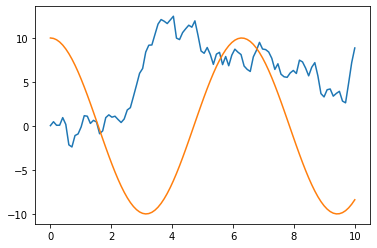

In [76]:
xs = np.linspace(0, 10, 100)
plt.plot(xs, data.cumsum())
plt.plot(xs, 10 * np.cos(xs))


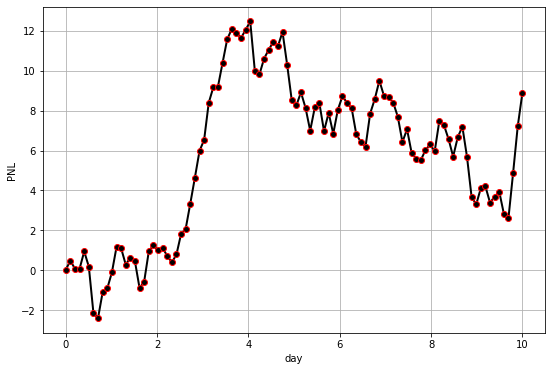

In [78]:
fig, ax = plt.subplots()
ax.plot(xs, data.cumsum(), "o-k", lw=2, mec="r")
ax.set_xlabel('day')
ax.set_ylabel('PNL')
ax.grid()
fig.set_size_inches(9, 6)
fig.savefig('graph.png', dpi=300)

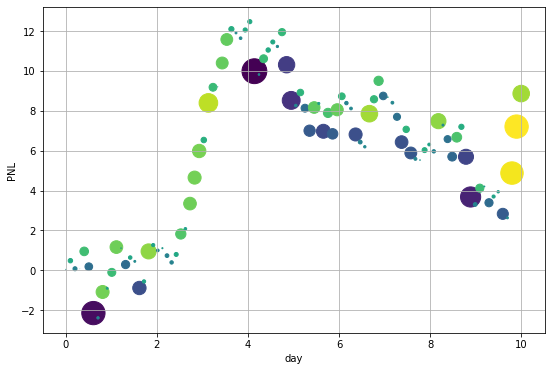

In [81]:
fig, ax = plt.subplots()
ax.scatter(xs, data.cumsum(), c=data, s=100*data**2)
ax.set_xlabel('day')
ax.set_ylabel('PNL')
ax.grid()
fig.set_size_inches(9, 6)
fig.savefig('graph.png', dpi=300)

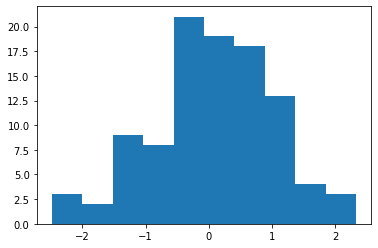

In [82]:
fig, ax = plt.subplots()
h = ax.hist(data)

In [9]:
square_list

[1, 4, 9, 144, 1849]

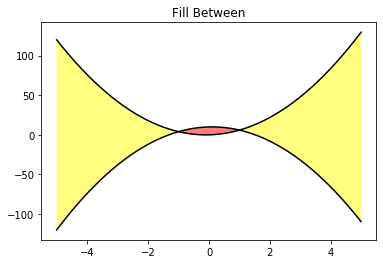

In [83]:
x = np.arange(-5, 5, 0.01)
y1 = -5*x*x + x + 10
y2 = 5*x*x + x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >y1, facecolor='yellow', alpha=0.5)
ax.fill_between(x, y1, y2, where=y2 <=y1, facecolor='red', alpha=0.5)
ax.set_title('Fill Between')

plt.show()

Visualistaion 3D dans jupyter : ipyvolume

Visualistaion 3D desktop : vispy

Interactivité : alatair, plotly/dash

Interactivité/animation : bqplot ipywidget


> Exercice : lire un fichier excel avec pandas et tracer un graphe

In [99]:
macro_series = pd.read_excel(
    '../reporter/data/series-1800-2015_simplified.xlsx',
    encoding='utf-8'
).set_index("année").T.dropna(how="all", axis=1)
macro_series.index = macro_series.index.astype(int)


In [100]:
macro_series.head()

année,Prix consommation,PIB,RDM,population,nb_ménages,TI_long_terme,TI_court_terme,Valeur_invest_actions,Valeur_invest_monnaie,Or,...,Prix_logement_Paris,valeur_invest_locatif,indice_loyers,ICC,conso_logements,transactions_immo,transactions_immo _ancien,dette_immo_menages,duree_prets_ancien,duree_prets_neuf
1800,0.000429,0.009952,0.008421,28601.353899,6882.055873,0.200361,0.06,NaN,0.000153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,0.000442,0.010102,0.008548,28741.950591,6915.886240,0.102212,0.06,NaN,0.000163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,0.000474,0.010253,0.008676,28883.238419,6949.882908,0.095345,0.06,3.326481e-08,0.000172,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,0.000474,0.010407,0.008806,29025.220781,6984.046694,0.097626,0.06,3.634091e-08,0.000183,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,0.000426,0.010564,0.008938,29167.901090,7018.378421,0.091757,0.06,3.932246e-08,0.000194,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


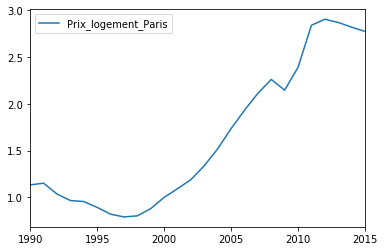

In [110]:
ax = macro_series.loc[1990:].plot(y="Prix_logement_Paris")
fig = ax.get_figure()
fig.savefig('pdf.png')

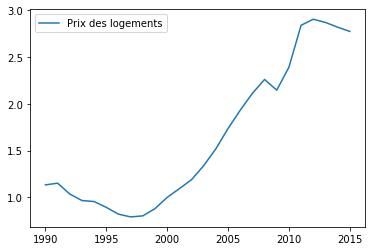

In [113]:
fig, ax = plt.subplots()
ax.plot(macro_series.loc[1990:, "Prix_logement_Paris"], label="Prix des logements")
ax.legend()

In [106]:
ax.get_figure

In [94]:
type(macro_series)

pandas.core.frame.DataFrame

In [93]:
macro_series.dtypes

année
Prix consommation            float64
PIB                          float64
RDM                          float64
population                   float64
nb_ménages                   float64
TI_long_terme                float64
TI_court_terme               float64
Valeur_invest_actions        float64
Valeur_invest_monnaie        float64
Or                           float64
prix_logement_Fr             float64
Prix_logement_Paris          float64
valeur_invest_locatif        float64
indice_loyers                float64
ICC                          float64
conso_logements              float64
transactions_immo            float64
transactions_immo _ancien    float64
dette_immo_menages           float64
duree_prets_ancien           float64
duree_prets_neuf             float64
dtype: object

In [98]:
macro_series.index

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [97]:
macro_series.index = macro_series.index.astype(int)

## Récupérer des données sur le web avec requests

> Exercice : Lire, mettre en forme, sauver et représenter des données web

In [7]:
link = "http://samples.openweathermap.org/data/2.5/forecast/hourly?id=524901&appid=b6907d289e10d714a6e88b30761fae22"

In [19]:
import requests
import json

In [10]:
response = requests.get(link)

In [21]:
wdata = json.loads(response.content)['list']

In [47]:
pd.read_json(json.dumps(json.loads(response.content)['list']), )

,clouds,dt,dt_txt,main,rain,snow,sys,weather,wind
0,{'all': 60},1553709600,2019-03-27 18:00:00,"{'temp': 272.09, 'temp_min': 271.358, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3.25, 'deg': 287.822}"
1,{'all': 2},1553713200,2019-03-27 19:00:00,"{'temp': 271.59, 'temp_min': 271.1, 'temp_max'...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.4, 'deg': 294.075}"
2,{'all': 1},1553716800,2019-03-27 20:00:00,"{'temp': 271.15, 'temp_min': 270.907, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.47, 'deg': 300.189}"
3,{'all': 1},1553720400,2019-03-27 21:00:00,"{'temp': 270.722, 'temp_min': 270.722, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.55, 'deg': 305.558}"
4,{'all': 1},1553724000,2019-03-27 22:00:00,"{'temp': 270.63, 'temp_min': 270.63, 'temp_max...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.59, 'deg': 309.126}"
5,{'all': 0},1553727600,2019-03-27 23:00:00,"{'temp': 270.421, 'temp_min': 270.421, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.67, 'deg': 307.204}"
6,{'all': 7},1553731200,2019-03-28 00:00:00,"{'temp': 270.201, 'temp_min': 270.201, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.94, 'deg': 304.735}"
7,{'all': 66},1553734800,2019-03-28 01:00:00,"{'temp': 269.942, 'temp_min': 269.942, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.24, 'deg': 306.38}"
8,{'all': 67},1553738400,2019-03-28 02:00:00,"{'temp': 269.768, 'temp_min': 269.768, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.63, 'deg': 313.941}"
9,{'all': 78},1553742000,2019-03-28 03:00:00,"{'temp': 270.054, 'temp_min': 270.054, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 5.05, 'deg': 323.001}"


In [23]:
wdata = pd.DataFrame(wdata)

In [34]:
wdata['main'].loc[0]

{'temp': 272.09,
 'temp_min': 271.358,
 'temp_max': 272.09,
 'pressure': 1018.01,
 'sea_level': 1018.01,
 'grnd_level': 997.153,
 'humidity': 100,
 'temp_kf': 0.73}

In [35]:
data0 = wdata['main'].loc[0]

In [37]:
data0.pop('temp')

272.09

In [38]:
data0

{'temp_min': 271.358,
 'temp_max': 272.09,
 'pressure': 1018.01,
 'sea_level': 1018.01,
 'grnd_level': 997.153,
 'humidity': 100,
 'temp_kf': 0.73}

In [ ]:
wdata['main'].loc[0].pop('temp')

In [39]:
wdata

,clouds,dt,dt_txt,main,rain,snow,sys,weather,wind
0,{'all': 60},1553709600,2019-03-27 18:00:00,"{'temp_min': 271.358, 'temp_max': 272.09, 'pre...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3.25, 'deg': 287.822}"
1,{'all': 2},1553713200,2019-03-27 19:00:00,"{'temp': 271.59, 'temp_min': 271.1, 'temp_max'...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.4, 'deg': 294.075}"
2,{'all': 1},1553716800,2019-03-27 20:00:00,"{'temp': 271.15, 'temp_min': 270.907, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.47, 'deg': 300.189}"
3,{'all': 1},1553720400,2019-03-27 21:00:00,"{'temp': 270.722, 'temp_min': 270.722, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.55, 'deg': 305.558}"
4,{'all': 1},1553724000,2019-03-27 22:00:00,"{'temp': 270.63, 'temp_min': 270.63, 'temp_max...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.59, 'deg': 309.126}"
5,{'all': 0},1553727600,2019-03-27 23:00:00,"{'temp': 270.421, 'temp_min': 270.421, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.67, 'deg': 307.204}"
6,{'all': 7},1553731200,2019-03-28 00:00:00,"{'temp': 270.201, 'temp_min': 270.201, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.94, 'deg': 304.735}"
7,{'all': 66},1553734800,2019-03-28 01:00:00,"{'temp': 269.942, 'temp_min': 269.942, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.24, 'deg': 306.38}"
8,{'all': 67},1553738400,2019-03-28 02:00:00,"{'temp': 269.768, 'temp_min': 269.768, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.63, 'deg': 313.941}"
9,{'all': 78},1553742000,2019-03-28 03:00:00,"{'temp': 270.054, 'temp_min': 270.054, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 5.05, 'deg': 323.001}"


In [57]:
wdata_main = pd.DataFrame.from_records(wdata['main'])

In [51]:
wdata_main.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min
0,997.153,100,1018.010,1018.010,NaN,0.73,272.090,271.358
1,997.403,100,1018.335,1018.335,271.590,0.49,271.590,271.100
2,997.864,100,1018.794,1018.794,271.150,0.24,271.150,270.907
3,998.290,100,1019.211,1019.211,270.722,0.00,270.722,270.722
4,998.674,100,1019.580,1019.580,270.630,0.00,270.630,270.630


In [53]:
wdata.loc[0, 'weather']

[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]

In [56]:
wdata_weather = pd.DataFrame.from_records(
    pd.DataFrame.from_records(wdata['weather'])[0])

In [66]:
wdata_f = pd.concat([wdata_main, wdata_weather], axis=1)
wdata_f['dt'] = wdata['dt']
wdata_f.index = pd.DatetimeIndex(wdata['dt_txt'])

In [67]:
wdata_f.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,description,icon,id,main,dt
dt_txt,,,,,,,,,,,,,
2019-03-27 18:00:00,997.153,100,1018.010,1018.010,NaN,0.73,272.090,271.358,broken clouds,04n,803,Clouds,1553709600
2019-03-27 19:00:00,997.403,100,1018.335,1018.335,271.590,0.49,271.590,271.100,clear sky,02n,800,Clear,1553713200
2019-03-27 20:00:00,997.864,100,1018.794,1018.794,271.150,0.24,271.150,270.907,clear sky,01n,800,Clear,1553716800
2019-03-27 21:00:00,998.290,100,1019.211,1019.211,270.722,0.00,270.722,270.722,clear sky,01n,800,Clear,1553720400
2019-03-27 22:00:00,998.674,100,1019.580,1019.580,270.630,0.00,270.630,270.630,clear sky,01n,800,Clear,1553724000


In [68]:
wdata_f.resample("D").mean()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,id,dt
dt_txt,,,,,,,,,,
2019-03-27,998.045000,100.0,1018.963167,1018.963167,270.902600,0.243333,271.100500,270.856333,800.500000,1.553719e+09
2019-03-28,1002.171208,100.0,1022.965167,1022.965167,271.927000,0.000000,271.927000,271.927000,794.958333,1.553773e+09
2019-03-29,999.287417,100.0,1019.671750,1019.671750,274.227667,0.000000,274.227667,274.227667,786.958333,1.553859e+09
2019-03-30,993.445375,100.0,1013.605583,1013.605583,275.650375,0.000000,275.650375,275.650375,764.750000,1.553945e+09
2019-03-31,992.348389,100.0,1012.480111,1012.480111,279.269111,0.000000,279.269111,279.269111,786.277778,1.554021e+09


In [70]:
wdata_f['main'].unique()

array(['Clouds', 'Clear', 'Snow', 'Rain'], dtype=object)

In [73]:
wdata_f.groupby("main")[['temp', 'pressure']].mean()

,temp,pressure
main,,
Clear,272.111364,1017.023545
Clouds,275.043247,1017.752423
Rain,278.080750,1012.638250
Snow,273.600000,1021.913333


In [83]:
def mean_t_C(df):
    return df['temp'].mean() - 273.15
wdata_f.groupby("main").apply(mean_t_C)


wdata_f.groupby("main").apply(
    lambda df : df['temp'].mean() - 273.15)


main
Clear    -1.038636
Clouds    1.893247
Rain      4.930750
Snow      0.450000
dtype: float64

In [84]:
wdata_f['temp_C'] = wdata_f['temp'] - 273.5
wdata_f['temp_F'] = (9/5) * wdata_f['temp_C'] + 32


In [86]:
with requests.get(link) as response:
    c = response.content

In [93]:
wdata_f["color"] = 0

In [95]:
categories = wdata_f["main"].unique()

In [98]:
for i, cat in enumerate(categories):
    wdata_f.loc[wdata_f['main'] == cat, "color"] = i

In [99]:
wdata_f.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,description,icon,id,main,dt,temp_C,temp_F,color
dt_txt,,,,,,,,,,,,,,,,
2019-03-27 18:00:00,997.153,100,1018.010,1018.010,NaN,0.73,272.090,271.358,broken clouds,04n,803,Clouds,1553709600,NaN,NaN,0
2019-03-27 19:00:00,997.403,100,1018.335,1018.335,271.590,0.49,271.590,271.100,clear sky,02n,800,Clear,1553713200,-1.910,28.5620,1
2019-03-27 20:00:00,997.864,100,1018.794,1018.794,271.150,0.24,271.150,270.907,clear sky,01n,800,Clear,1553716800,-2.350,27.7700,1
2019-03-27 21:00:00,998.290,100,1019.211,1019.211,270.722,0.00,270.722,270.722,clear sky,01n,800,Clear,1553720400,-2.778,26.9996,1
2019-03-27 22:00:00,998.674,100,1019.580,1019.580,270.630,0.00,270.630,270.630,clear sky,01n,800,Clear,1553724000,-2.870,26.8340,1


In [100]:
wdata_f.tyty = 0

In [102]:
wdata_f.tyty

0

In [113]:
def repeat(arg):
    return arg, arg

In [114]:
res, res = repeat(3)

In [115]:
a = 1
b = 2

a, b = b, a

In [116]:
a, b

(2, 1)

In [ ]:
if path.startswith('http'):
    fig, ax = plot_web()

elif path.endswith('xlsx'):
    fig, ax = plot_local()

else:
    raise ValueError("Argument not understood, should be "
                     "an url or path to an excel file")
    
fig.savefig()
return fig, ax

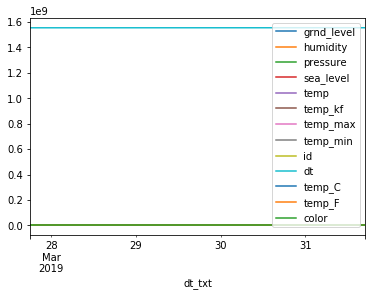

In [110]:
ax = wdata_f.plot()

In [111]:
fig = ax.get_figure()

In [ ]:
plt.savefig()

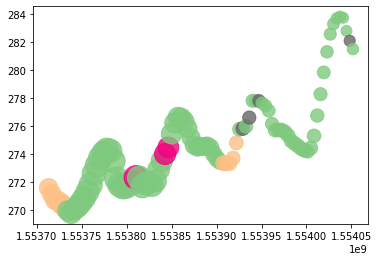

In [108]:
fig, ax = plt.subplots()

ax.scatter(wdata_f.dt, y=wdata_f.temp, c=wdata_f.color, cmap='Accent', alpha=0.8, s=(wdata_f.pressure-1000)**2)


In [ ]:
ax.set_xticklabels()

In [ ]:
macro_series = pd.read_excel(
    '../reporter/data/series-1800-2015_simplified.xlsx',
    encoding='utf-8'
).set_index("année").T.dropna(how="all", axis=1)
macro_series.index = macro_series.index.astype(int)

In [ ]:
def make_graph(url_or_path, graph_file)

In [121]:
import sqlite3

with sqlite3.connect('../chinook.db') as conn:
    df = pd.read_sql_query('select * from tracks', conn)



In [122]:
df

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99
